# The Lorenz model

In [1]:
import logging

from functools import partial

import numpy as np
import scipy.stats as ss

import elfi
from elfi.examples.lorenz import get_model

logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20170530
np.random.seed(seed)

In [2]:
m = get_model()

In [3]:
res = m['Lorenz'].generate(1)

In [4]:
res

array([[[ 6.9 ,  0.12,  2.87,  1.22,  0.07,  1.32,  7.42,  1.51, -3.73,
          0.78,  3.18,  5.91,  4.7 , -1.22,  0.13,  3.2 ,  5.6 , -2.04,
          1.31,  2.63,  8.78, -2.57,  0.37,  0.28,  1.19,  5.13,  9.55,
         -0.56,  1.56,  2.82,  3.98,  3.82, -3.08,  0.79,  0.79,  6.83,
         -0.39, -2.43,  1.12,  4.43],
        [ 7.  ,  0.14,  2.76,  1.11, -0.09,  1.17,  7.36,  2.27, -3.73,
          0.65,  2.91,  5.54,  5.24, -0.75, -0.13,  3.08,  5.77, -2.05,
          0.96,  2.17,  9.01, -2.27, -0.35,  0.09,  1.01,  4.84,  9.78,
          0.08,  1.34,  2.52,  3.73,  4.26, -3.03,  0.39,  0.44,  6.81,
         -0.07, -2.71,  1.25,  4.08]]])

In [5]:
m['d'].generate(1000)

array([-1.47e+01, -1.40e+01, -3.52e+00, -3.52e+00, -1.04e+01, -7.66e+00,
       -1.72e+01, -2.73e+01, -1.00e+01, -1.30e+01, -1.24e+01, -1.41e+01,
       -5.60e+00, -2.66e-01, -1.59e+00, -4.39e+00, -3.44e+01, -1.28e+01,
       -1.23e+01, -5.06e+00, -1.43e+01, -8.70e+00, -4.20e+00, -8.62e+00,
       -2.57e+01, -6.02e+01, -1.21e+01, -5.80e+00, -4.29e+00, -1.16e+01,
       -2.76e+01, -5.00e+00, -1.04e+01, -5.70e+00, -2.24e+01, -1.88e+00,
       -3.54e+01, -1.25e+01, -1.20e+01, -6.72e+00, -3.52e+00, -1.12e+01,
        2.08e+00, -2.01e+01, -2.14e+00, -3.52e+00, -1.75e+01, -1.43e+01,
       -1.59e+01, -3.69e+00, -9.29e+00, -3.95e+00, -5.02e+00, -1.99e+01,
       -2.21e+01, -8.99e+00, -4.74e-01, -6.29e+00, -4.67e+00, -1.72e+01,
       -3.40e+01, -5.10e+00, -5.02e+00, -8.73e+00, -1.61e+01, -1.04e+01,
       -1.98e+01, -1.85e+01, -2.67e+01, -1.58e+01, -2.45e+00, -2.58e+01,
       -5.28e+00, -1.66e+01, -1.26e+01, -1.91e+01, -1.08e+01, -2.19e+01,
       -8.50e+00, -3.08e-01, -3.17e+00, -1.89e+01, 

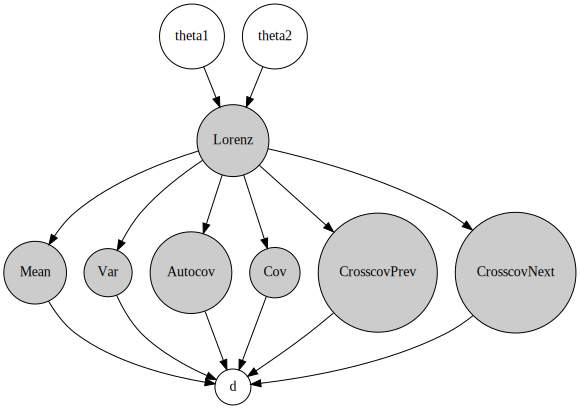

In [6]:
elfi.draw(m['d'])

In [7]:
rej = elfi.Rejection(m['d'], batch_size=1000, seed=seed)

In [ ]:
%%time
res = rej.sample(1000)

In [ ]:
res.summary()

In [ ]:
# %time result2 = rej.sample(N, threshold=0.2)

# print(result2)  # the Sample object's __str__ contains the output from summary()

In [ ]:
%%time
res.plot_pairs()

# References

- [1] Dutta R, Corander J, Kaski S, Gutmann MU. Likelihood-free inference by ratio estimation. arXiv preprint arXiv:1611.10242. 2016 Nov.